In [1]:
#lets import in the libraries
import pandas as pd
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns; sns.set()
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols    
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df_wash_school=pd.read_csv("WASH_school.csv",encoding="latin-1")

In [57]:
df_wash_school.head()

,Country,Year,School age population (thousands),urban,pre-primary,primary,secondary,NWA_Basic water service,NWA_Limited water service,NWA_No water service,...,RH_No hygiene service,PPH_Basic hygiene service,PPH_Limited hygiene service,PPH_No hygiene service,PH_Basic hygiene service,PH_Limited hygiene service,PH_No hygiene service,SH_Basic hygiene service,SH_Limited hygiene service,SH_No hygiene service
0,Afghanistan,2016,13299.24707,27.13200188,15.83112907,45.34436417,38.82450485,-,70,30,...,-,-,-,-,-,-,-,-,-,-
1,Algeria,2016,8512.623047,71.30400085,10.01031017,42.57013321,47.41955566,93.30671292,0,6.693287078,...,-,-,-,-,97.78,-,-,99.3,-,-
2,Andorra,2016,-,-,-,-,-,100,0,0,...,-,-,-,-,100,0,0,100,0,0
3,Angola,2014,9412.754883,43.27400589,9.717367172,50.81467819,39.46795654,-,51,49,...,-,-,-,-,-,-,-,-,-,-
4,Argentina,2016,10821.82813,91.89299774,20.48494911,40.30799484,39.20705414,-,89.9,10.1,...,-,-,-,-,-,-,-,-,-,-


In [12]:
df_wash_school.columns

Index(['Country', 'Year', 'School age population (thousands)', 'urban',
       'pre-primary', 'primary', 'secondary', 'NWA_Basic water service',
       'NWA_Limited water service', 'NWA_No water service',
       'UWA_Basic water service', 'UWA_Limited water service',
       'UWA_No water service', 'RWA_Basic water service ',
       'RWA_Limited water service ', 'RWA_No water service ',
       'PPWA_Basic water service ', 'PPWA_Limited water service ',
       'PPWA_No water service ', 'PWA_Basic water service',
       'PWA_Limited water service ', 'PWA_No water service ',
       'SWA_Basic water service ', 'SWA_Limited water service ',
       'SWA_No water service', 'NS_Basic sanitation service',
       'NS_Limited sanitation service', 'NS_No sanitation service ',
       'US_Basic sanitation service', 'US_Limited sanitation service',
       'US_No sanitation service ', 'RS_Basic sanitation service',
       'RS_Limited sanitation service', 'RS_No sanitation service ',
       'PPS_Basic s

In [9]:
Litracy_rates=pd.read_csv("Litracy_rates.csv",encoding="latin-1")

In [10]:
Litracy_rates.head()

,EDULIT_IND,Indicator,Country,TIME,Value
0,LR_AG15T24_GPI,"Youth literacy rate, population 15-24 years, g...",Morocco,2018,0.99347
1,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",Latin America and the Caribbean,2013,97.69499
2,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",Latin America and the Caribbean,2014,98.03670
3,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",Latin America and the Caribbean,2015,98.10980
4,LR_AG15T24_M,"Youth literacy rate, population 15-24 years, m...",Latin America and the Caribbean,2016,98.22810


In [17]:
df_wash_school.iloc[:,60]

0                -
1                -
2                0
3                -
4                -
5                0
6                0
7                0
8      2.645502646
9                0
10               0
11               0
12               -
13               -
14     13.10679612
15               -
16               -
17         2.07082
18               -
19               -
20               -
21            57.8
22               -
23               -
24               -
25               -
26               -
27               0
28               0
29               -
          ...     
122              0
123              -
124              -
125              0
126              -
127              0
128              0
129              0
130              -
131              -
132              -
133              -
134              0
135              -
136              -
137              0
138              -
139              -
140              -
141              -
142              -
143         

In [58]:
for i in range(0,152):
    for j in [7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58]:
        if df_wash_school.iloc[i,j]!="-" and df_wash_school.iloc[i,j+1]!="-":
            if round(float(df_wash_school.iloc[i,j]),0)+round(float(df_wash_school.iloc[i,j+1]),0)==100:
                df_wash_school.iloc[i,j+2]=0
        if df_wash_school.iloc[i,j]!="-" and df_wash_school.iloc[i,j+2]!="-":
            if round(float(df_wash_school.iloc[i,j]),0)+round(float(df_wash_school.iloc[i,j+2]),0)==100:
                df_wash_school.iloc[i,j+1]=0
        if df_wash_school.iloc[i,j+2]!="-" and df_wash_school.iloc[i,j+1]!="-":
            if round(float(df_wash_school.iloc[i,j+2]),0)+round(float(df_wash_school.iloc[i,j+1]),0)==100:
                df_wash_school.iloc[i,j]=0    
            
                        
    

In [59]:
df_wash_school.to_csv("df_wash_school_imputed_last.csv")

(152, 61)

In [60]:
df_wash_school_imputed=pd.read_csv("df_wash_school_imputed_last.csv",encoding="latin-1")

In [93]:
is_2016 =  df_wash_school_imputed['Year']==2016

In [94]:
wash_school_2016=df_wash_school_imputed[is_2016]

In [95]:
Litracy_rate_2016=Litracy_rates[is_2016_2]

In [ ]:
is_2016=

In [96]:
is_adult_both_sexes=Litracy_rate_2016["Indicator"]=="Adult literacy rate, population 15+ years, both sexes (%)"

In [97]:
Litracy_rate_2016_adult=Litracy_rate_2016[is_adult_both_sexes]

In [98]:
Litracy_rate_2016_adult.head()

,EDULIT_IND,Indicator,Country,TIME,Value
21,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",Lower middle income countries,2013,74.13088
22,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",Lower middle income countries,2014,74.84184
23,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",Lower middle income countries,2015,75.59041
24,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",Lower middle income countries,2016,76.25343
43,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",Pakistan,2013,55.59499


In [102]:
is_20166=Litracy_rate_2016['TIME']==2016

In [110]:
new_litracy=Litracy_rate_2016[is_20166]

In [112]:
merged_data_2=pd.merge(wash_school_2016,new_litracy,on="Country",how="left")

In [103]:
new_litracy=Litracy_rate_2016[is_20166]

In [115]:
merged_data=pd.merge(wash_school_2016,Litracy_rate_2016_adult,left_on="Country",right_on="Country",how="left")

In [117]:
merged_data.to_csv("final_Education_2.csv")

In [114]:
new_litracy['Country']

4        Latin America and the Caribbean
11                    Dominican Republic
18                            Bangladesh
24         Lower middle income countries
31                    Sub-Saharan Africa
37                              Paraguay
50                                 World
60                              Honduras
70                                Brazil
77                                 Spain
88            Central and Eastern Europe
94             East Asia and the Pacific
100                               Mexico
106                             Colombia
111        Upper middle income countries
123                              Bahrain
129                                 Chad
134                                 Peru
139                             Malaysia
147                              Uruguay
155              Middle income countries
161                                Qatar
167           Iran (Islamic Republic of)
175                           Azerbaijan
180             

In [119]:
merged_data_3=merged_data.drop_duplicates(subset ="Country",keep='first',) 

In [121]:
merged_data_3.to_csv("merged_data_3.csv")

In [88]:
merged_data.to_csv("merged_school_wash.csv")

In [80]:
dd=pd.read_csv("merged_data_4.csv",encoding="latin-1")

In [81]:
dd.head()

,Unnamed: 0,Country_full,Country,Year,School age population (thousands),urban,pre-primary,primary,secondary,NWA_Basic water service,...,PH_Basic hygiene service,PH_Limited hygiene service,PH_No hygiene service,SH_Basic hygiene service,SH_Limited hygiene service,SH_No hygiene service,EDULIT_IND,Indicator,TIME,Value
0,0,Afghanistan,Afgh,2016,13299.24707,27.13200188,15.83112907,45.34436417,38.82450485,0,...,-,-,-,-,-,-,NaN,NaN,NaN,NaN
1,1,Algeria,Alge,2016,8512.623047,71.30400085,10.01031017,42.57013321,47.41955566,93.30671292,...,97.78,-,-,99.3,-,-,NaN,NaN,NaN,NaN
2,2,Andorra,Ando,2016,-,-,-,-,-,100,...,100,0,0,100,0,0,NaN,NaN,NaN,NaN
3,3,Argentina,Arge,2016,10821.82813,91.89299774,20.48494911,40.30799484,39.20705414,0,...,-,-,-,-,-,-,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",2013.0,99.12195
4,7,Australia,Aust,2016,4197.949219,89.55399323,7.541897297,51.23599625,41.22210693,100,...,100,0,0,100,0,0,NaN,NaN,NaN,NaN


In [17]:
dd=pd.read_csv("merged_data_3.csv")

In [ ]:
asia = ['Afghanistan', 'Bahrain', 'United Arab Emirates','Saudi Arabia', 'Kuwait', 'Qatar', 'Oman',
    'Sultanate of Oman','Lebanon', 'Iraq', 'Yemen', 'Pakistan', 'Lebanon', 'Philippines', 'Jordan']
europe = ['Germany','Spain', 'France', 'Italy', 'Netherlands', 'Norway', 'Sweden','Czech Republic', 'Finland',
      'Denmark', 'Czech Republic', 'Switzerland', 'UK', 'UK&I', 'Poland', 'Greece','Austria',
      'Bulgaria', 'Hungary', 'Luxembourg', 'Romania' , 'Slovakia', 'Estonia', 'Slovenia','Portugal',
      'Croatia', 'Lithuania', 'Latvia','Serbia', 'Estonia', 'ME', 'Iceland' ]
africa = ['Morocco', 'Tunisia', 'Africa', 'ZA', 'Kenya']
other = ['USA', 'Australia', 'Reunion', 'Faroe Islands']



In [ ]:
def GetConti(counry):
    if counry in asia:
        return "Asia"
    elif counry in europe:
        return "Europe"
    elif counry in africa:
        return "Africa"
    else:
        return "other"

In [126]:
dd['Continent'] = dd['Country'].apply(lambda x: GetConti(x)

NameError: name 'df' is not defined

In [6]:
dd.columns

Index(['Unnamed: 0', 'Country', 'Year', 'School age population (thousands)',
       'urban', 'pre-primary', 'primary', 'secondary',
       'NWA_Basic water service', 'NWA_Limited water service',
       'NWA_No water service', 'UWA_Basic water service',
       'UWA_Limited water service', 'UWA_No water service',
       'RWA_Basic water service ', 'RWA_Limited water service ',
       'RWA_No water service ', 'PPWA_Basic water service ',
       'PPWA_Limited water service ', 'PPWA_No water service ',
       'PWA_Basic water service', 'PWA_Limited water service ',
       'PWA_No water service ', 'SWA_Basic water service ',
       'SWA_Limited water service ', 'SWA_No water service',
       'NS_Basic sanitation service', 'NS_Limited sanitation service',
       'NS_No sanitation service ', 'US_Basic sanitation service',
       'US_Limited sanitation service', 'US_No sanitation service ',
       'RS_Basic sanitation service', 'RS_Limited sanitation service',
       'RS_No sanitation service '

In [82]:
BWS=dd['NWA_Basic water service']

In [83]:
nn=pd.DataFrame(BWS,columns=['NWA_Basic water service'])

In [84]:
nn['Value']=dd['Value']

In [85]:
nn['Country']=dd['Country']

In [86]:
nn_new=nn.dropna()

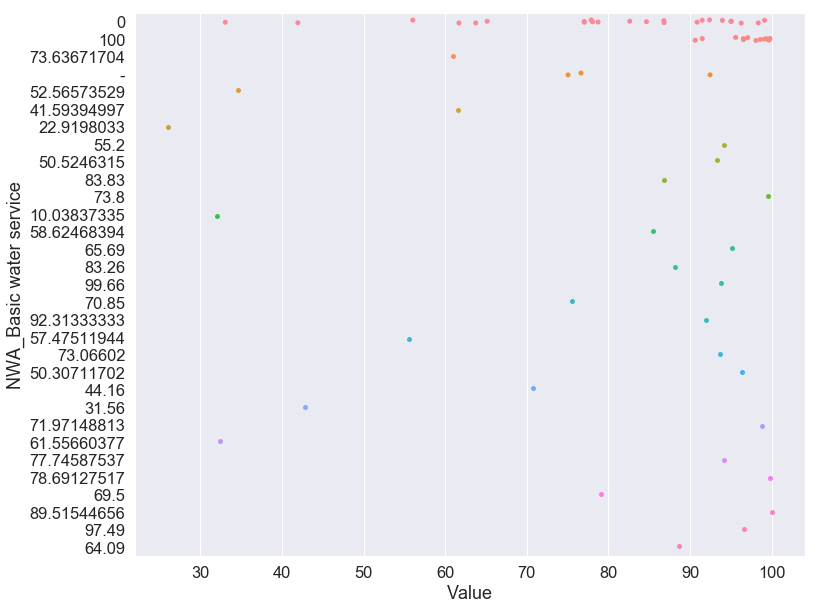

In [87]:
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 1.5)
sns.stripplot(x="Value", y="NWA_Basic water service", data=nn_new)

In [24]:
nn_new

,NWA_Basic water service,Value,Country
3,0,99.12195,Argentina
5,100,99.78936,Azerbaijan
6,100,97.06668,Bahrain
7,73.63671704,61.01554,Bangladesh
8,100,99.60000,Barbados
13,-,92.45508,Bolivia (Plurinational State of)
14,0,86.82318,Botswana
15,0,91.48424,Brazil
16,52.56573529,34.59940,Burkina Faso
17,41.59394997,61.56973,Burundi


In [88]:
nn_new=nn_new.replace("-",np.nan)

In [89]:
nn_new=nn_new.dropna()

In [91]:
nn_new["NWA_Basic water service"]=nn_new["NWA_Basic water service"].astype(float)

In [93]:
is_above_0=nn_new["NWA_Basic water service"]>0

In [94]:
nn_new=nn_new[is_above_0]

In [96]:
nn_new=nn_new.reset_index(drop=True)

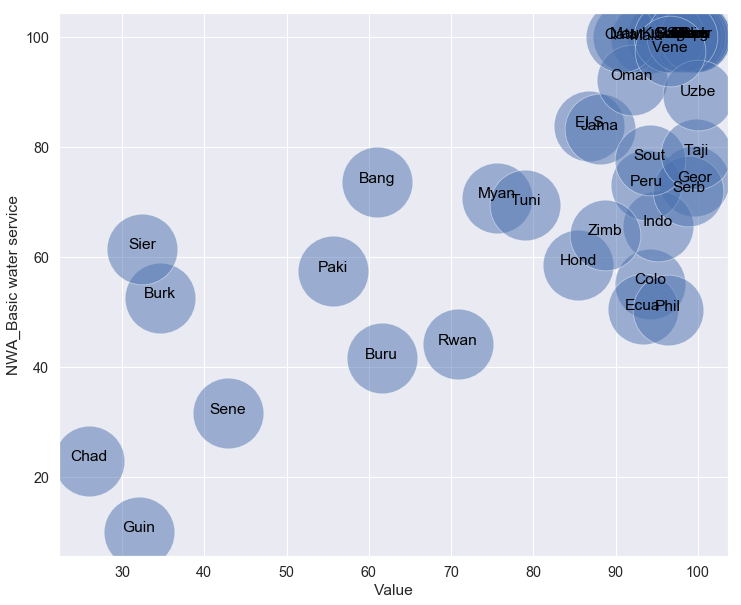

In [103]:
# Load libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(x="Value", y="NWA_Basic water service",s=5000, data=nn_new, alpha = 0.5)
sns.set(font_scale = 1.3)

# ax.set_xlim(0,6)
# ax.set_ylim(-2, 18)

#For each point, we add a text inside the bubble
for line in range(0,nn_new.shape[0]):
     ax.text(nn_new["Value"][line], nn_new["NWA_Basic water service"][line], nn_new["Country"][line], horizontalalignment='center', size='medium', color='black')

In [31]:
nn_new["Value"][1]

KeyError: 1

In [188]:
nn_new["Country"][5]

'Azerbaijan'

In [ ]:
#Clustering

In [ ]:
'NWA_Basic water service','NH_Basic hygiene service' 'NS_Basic sanitation service' 'Value'

In [105]:
wash=dd["NWA_Basic water service"]

In [123]:
wash=pd.DataFrame(dd["NWA_Basic water service"],columns=["NWA_Basic water service"])

In [124]:
wash['Hygine']=dd["NH_Basic hygiene service"]

In [125]:
wash['Sanitation']=dd["NS_Basic sanitation service"]

In [126]:
#wash['Country']=dd["Country_full"]
#wash['Value']=dd["Value"]

In [127]:
wash.head()

,NWA_Basic water service,Hygine,Sanitation
0,0,-,-
1,93.30671292,98.58,98.95
2,100,100,100
3,0,-,77
4,100,100,100


In [131]:
wash=wash.replace("-",np.nan)

In [132]:
wash=wash.dropna()

In [134]:
wash

,NWA_Basic water service,Hygine,Sanitation,Cluster
1,93.30671292,98.58,98.95,0
2,100,100,100,0
4,100,100,100,0
5,100,100,100,0
6,100,100,100,0
7,73.63671704,44,58.55357143,2
8,100,100,100,0
9,100,100,100,0
12,59.4424581,0,76.06562215,2
15,0,61.02142,83.90410959,1


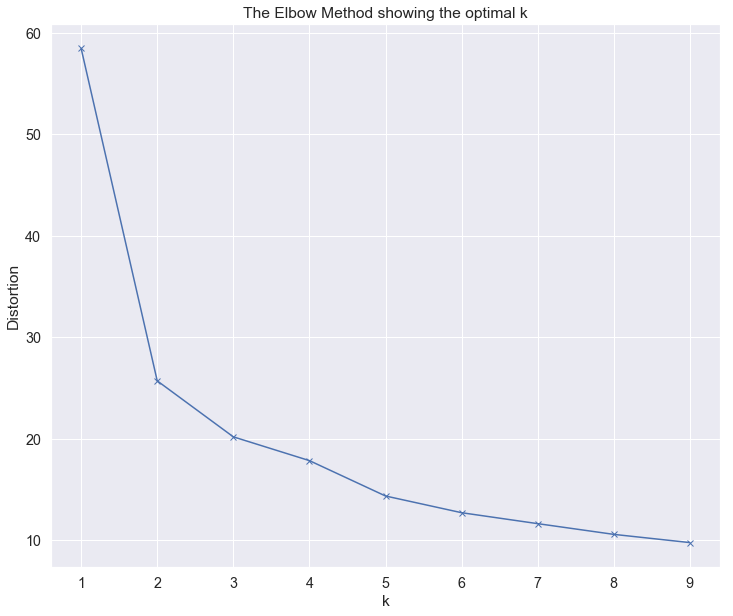

In [136]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

# plt.plot()
# plt.xlim([0, 10])
# plt.ylim([0, 10])
# plt.title('Dataset')
# plt.scatter(x1, x2)
# plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(wash)
    kmeanModel.fit(wash)
    distortions.append(sum(np.min(cdist(wash, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / wash.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [137]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# X, _ = make_blobs(n_samples=10, centers=3, n_features=4)

# df = pd.DataFrame(X, columns=['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4'])

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(wash)

wash['Cluster'] = y

print(wash.head())

  NWA_Basic water service Hygine Sanitation  Cluster
1             93.30671292  98.58      98.95        1
2                     100    100        100        1
4                     100    100        100        1
5                     100    100        100        1
6                     100    100        100        1


In [138]:
wash

,NWA_Basic water service,Hygine,Sanitation,Cluster
1,93.30671292,98.58,98.95,1
2,100,100,100,1
4,100,100,100,1
5,100,100,100,1
6,100,100,100,1
7,73.63671704,44,58.55357143,0
8,100,100,100,1
9,100,100,100,1
12,59.4424581,0,76.06562215,0
15,0,61.02142,83.90410959,2


In [157]:
wash['NWA_Basic water service'] = pd.to_numeric(wash['NWA_Basic water service'], errors='coerce')
wash['Hygine'] = pd.to_numeric(wash['Hygine'], errors='coerce')
wash['Sanitation'] = pd.to_numeric(wash['Sanitation'], errors='coerce')
wash['cluster'] = pd.to_numeric(wash['Cluster'], errors='coerce')                                                   

In [165]:
sns.set_palette("Set1", 8, .75)

In [167]:
colors = ["#FF0B04", "#4374B3",'#1104ff', '#2aff04']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

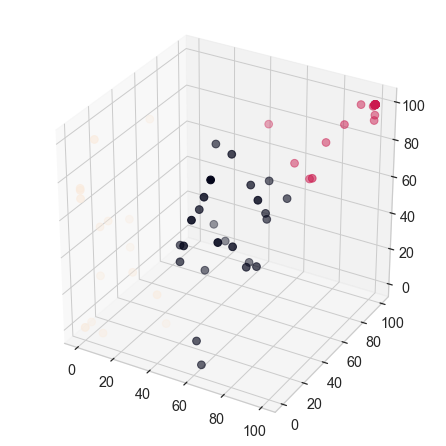

In [169]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

# x = np.random.uniform(1,20,size=20)
# y = np.random.uniform(1,100,size=20)
# z = np.random.uniform(1,100,size=20)
sns.set_palette(sns.color_palette(colors))
ax.scatter(xs=wash['NWA_Basic water service'],ys= wash['Hygine'], zs=wash['Sanitation'],s=60, c=wash['Cluster'])
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

plt.show()

ValueError: 'c' argument has 88 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

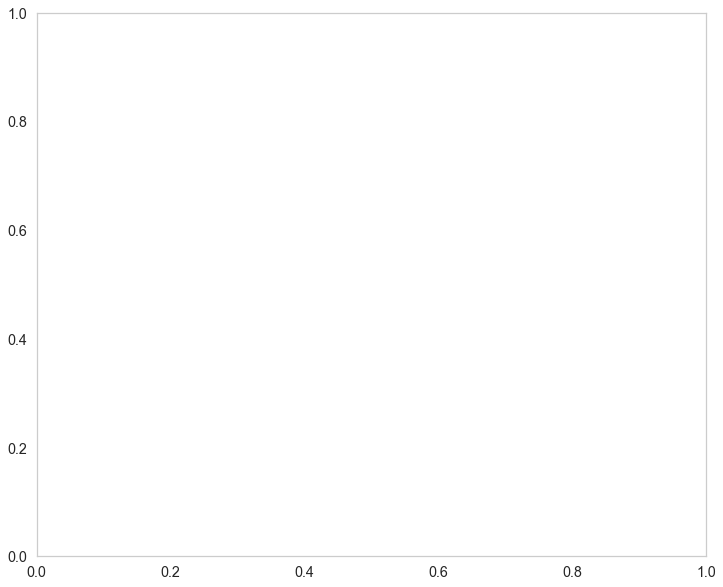

In [177]:
sns.scatterplot(wash['NWA_Basic water service'],wash['Hygine'],s=60, c=wash['Cluster'])